# Time and Motion in Two Dimensions (2D)

This notebook contains some background and (programming) exercises belonging to Chapter 3 of the book "Robotics, Vision and Control" of Peter Corke. https://petercorke.com/rvc/home/. Note that in this course on Mobile Robotics, we will only deal with 2D paths and trajectories. 

Before you start with the exercises:
* Watch the 9 video clips in the online masterclass on Paths and Trajectories: https://robotacademy.net.au/masterclass/paths-and-trajectories/
* We will skip Section 3.1 of the book, as it deals with 3D velocities. Instead, in this notebook, the concept of spatial and rotational velocities in 2D are covered. 
* Read Section 3.3 of the book.<br>Note that the book also deals with 3D motions and discusses topics like *the exponential form*, *wrenches* and *quaternions*. In this course, we will only work with *2D transformation* and *rotation matrices*. 

## Spatial and Rotational Velocity in 2D

In the previous notebook `s01_position_and_orientation`, you learned about the representation of 2D position and orientation, or in other words, the 2D pose. Here, you will learn about the change in pose over time. This change is determined by the **spatial velocity** and the **rotational velocity**.

The **spatial velocity** is the time-derivative of the position of an object:
$$
\dot{x} = \frac{dx}{dt}\\ 
\dot{y} = \frac{dy}{dt}
$$

In continuous time, the position at time t can be calculated as:
$$
x(t) = \int \dot{x}(t) dx \\
y(t) = \int \dot{y}(t) dy
$$

However, when we work in discrete time, we calculate the next position $(x_{t+1},y_{t+1})$ given a time interval $\Delta t$, the current position of the object $(x_t, y_t)$, and the velocity $v = (\dot{x}, \dot{y})$:
$$
x_{t+1} = x_t + \dot{x}_t \cdot \Delta t \\
y_{t+1} = y_t + \dot{y}_t \cdot \Delta t \\
$$

Note that this is called the *Euler integration scheme* and that it is an approximation. The smaller $\Delta t$, the better the approximation.

In 2D, the **rotational velocity** is the time-derivative of the orientation of the object:
$$
\dot{\theta} = \frac{d\theta}{dt}
$$
and the orientation $\theta_{t+1}$ can be calculated by:
$$
\theta_{t+1} = \theta_t + \dot{\theta}_t \cdot \Delta t
$$



### Velocity in the robot's coordinate frame and the world coordinate frame

We can define a robot 

Most robots can move forwards-backwards with a velocity of $v$ and rotate left-right with an angular velocity of $\dot{\theta}$, but they cannot translate sideways. This means that the velocity in the coordinate frame {R} of the robot is:
$$
\dot{\boldsymbol{s}} = \begin{pmatrix}{}^R \dot{x} \\ {}^R \dot{y} \\ {}^R \dot\theta\end{pmatrix} = \begin{pmatrix}v \\ 0 \\ {}^R \dot\theta\end{pmatrix},
$$

In the world frame {W}, the velocity is defined as
$$
\begin{matrix}
{}^W\dot{x} =& {}^R\dot{x} \cos \theta =& v \cos \theta \\
{}^W\dot{y} =& {}^R\dot{x} \sin \theta =& v \sin \theta \\
{}^W\dot{\theta} =& {}^R \dot\theta =& {}^R \dot\theta
\end{matrix}
$$


Let's have a look at a simulation of the trajectory of a robot given its linear and angular velocities. 

**Exercise:**
* The function `nextState(..)` below takes as arguments `state`, which is the current state of the robot $(x_t, y_t, \theta_t)$m the linear velocity $v$ and angular velocity $\dot{\theta}$ as `v` and `dtheta`, and the timestep $\Delta t$ in `dT`. The function calculates the state in the next timestep. The state is here with respect to the world coordinate frame. 
* Check how the state for the next time step is calculated. Do you recognize the formulas from above?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def nextState(state, v, dtheta, dT):
    theta = state[2]
    vel = np.array( [v*np.cos(theta), v*np.sin(theta), dtheta] )
    
    next_state = state + vel*dT # SHOULD IT BE dtheta?

    return(next_state)

We will now look at the simulation of a robot that drives with a constant linear velocity of $v$ m and a constant angular speed of $\dot{\theta}$ rad/s. This robot will drive in a circle with a radius of $r = \frac{v}{\dot{\theta}}$ m, which can be derived as follows:

Since a full circle is $2\pi$ rad, it takes 
$$T = \frac{2\pi}{\dot{\theta}}$$  
to complete the circle. Given the velocity, this means that the circle has a circumference of 
$$c = T v = \frac{2\pi v}{\dot{\theta}}.$$ 
As the relation between the radius and circumference is 
$$c = 2\pi r,$$ 
this means that 
$$\frac{2\pi v}{\dot{\theta}}  = 2\pi r,$$
which results in 
$$r = \frac{v}{\dot{\theta}}.$$

With a velocity of $v=1.5$ m/s and an angular velocity of $\dot{\theta}=0.2$ rad/s, this results in a radius of $r = \frac{1.5}{0.2}=7.5$ m.

**Exercise:**
* The code below takes a linear velocity `v`, an angular velocity `dtheta` and a timestep `dT` to simulate the trajectory of the robot. Run the code. You will see the ideal trajectory in black and the simulated trajectory in red.
* Try a larger and a smaller timestep (e.g. 5 and 0.5). Which differences do you see?
* What is the minimal timestep that you need to get a reasonable simulation of the trajectory?

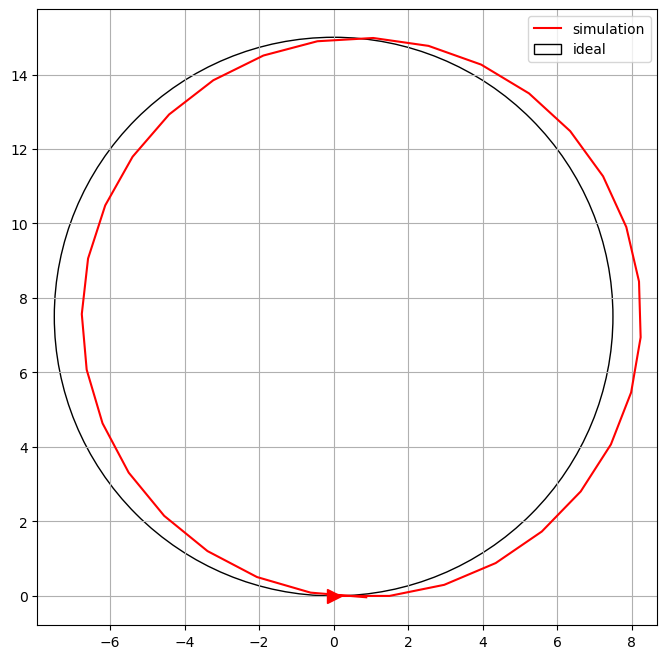

In [17]:
# Set the linear and angular velocity
v = 1.5
dtheta = 0.2

# Set the time step for simulation
dT = 1

# Set the starting pose to x=0, y=0, theta=0
state_0 = np.array([0,0,0])

### Simulate the trajectory of the robot using the Euler integration scheme
# Calculate the time needed to complete a full circle
T = 2*np.pi / dtheta #10    # Number of seconds to simulate
time = np.arange(0,T,step=dT)

# Collect the states over time
states = np.zeros((len(time)+1,3))
states[0,:] = state_0
prev_state = state_0
# Run the simulation
for i,t in enumerate(time):
    next_state = nextState(prev_state, v, dtheta, dT)
    states[i+1,:] = next_state
    prev_state = next_state
        
# Plot the resulting trajectory and the ideal trajectory
plt.figure(figsize=(8,8))
plt.plot(states[:,0], states[:,1], 'r-', label='simulation')
ideal_radius = v / dtheta
circle1 = plt.Circle((0, ideal_radius), ideal_radius, facecolor='None', edgecolor='k', label='ideal')
plt.plot(state_0[0], state_0[1], '>r', markersize=10)
plt.gca().add_patch(circle1)
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

#### Results:
.5 time steps seems to hug to the path more closely, whereas the timestep of 5 seems to not even be remotely close to sticking to the path


*\Delta t=1.0$ and $\Delta t=0.1$ is made. The later clearly shows a more accurate simulation. Reducing it to for instance $\Delta t=0.01$ will yield even better approximation, but also comes with a higher computational cost. There is therefore a trade-off between accuracy and computation costs.



## Paths and Trajectories

A **path** is a list of $N$ consecutive poses or states of the robot: $P = \{s_0, s_1, \ldots, s_n\}$.

A **trajectory** is a list of $N$ consecutive poses including time: $T = \{ \{s_0,t_0\}, \{s_1,t_1\}, \ldots, \{s_N,t_N\} \} $. So a trajectory is the state of the robot as a function of time $s(t)$.

### Smooth One-Dimensional Trajectories

Let's assume that we want to generate a trajectory for which the start and the end situations are known and that the start and end situations are defined by the position, velocity and acceleration at these points:

<table width=200>
    <tr>
        <td>Time</td>
        <td>$\boldsymbol{s}$</td>
        <td>$\dot{\boldsymbol{s}}$</td>
        <td>$\ddot{\boldsymbol{s}}$</td>
    </tr>
    <tr>
        <td>$t=0$</td>
        <td>$s_0$</td>
        <td>$\dot{s}_0$</td>
        <td>$\ddot{s}_0$</td>
    </tr>
    <tr>
        <td>$t=T$</td>
        <td>$s_T$</td>
        <td>$\dot{s}_T$</td>
        <td>$\ddot{s}_T$</td>
    </tr>
</table>

Based on these boundary conditions, a **smooth trajectory** can be calculated using a polynomial function of time. Since we have six conditions, we can use a quintic (fifth-order) polynomial:

$$
s(t) = At^5 + Bt^4 + Ct^3 + Dt^2 + Et + F
$$

The first-order derivative (velocity) is:

$$
\dot{s}(t) = 5At^4 + 4Bt^3 + 3Ct^2 + 2Dt + E
$$

And the second-order deriative (acceleration) is:

$$
\ddot{s}(t) = 20At^3 + 12Bt^2 + 6Ct + 2D
$$

Plugging in the boundary conditions for position, velocity and acceleration at $t=0$ and $t=T$ gives six equations, which can be put in matrix form:

$$
\begin{pmatrix}s_0 \\ s_T \\ \dot{s}_0 \\ \dot{s}_T \\ \ddot{s}_0 \\ \ddot{s}_T \end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 1 \\
T^5 & T^4 & T^3 & T^2 & T & 1 \\
0 & 0 & 0 & 0 & 1 & 0 \\
5T^4 & 4T^3 & 3T^2 & 2T & 1 & 0 \\
0 & 0 & 0 & 2 & 0 & 0 \\
20T^3 & 12T^2 & 6T & 2 & 0 & 0 \\
\end{pmatrix}
\begin{pmatrix}A \\ B \\ C \\ D \\ E \\ F \end{pmatrix}
$$

This square matrix can be inverted to determine the parameters $\{A,B,\ldots,F\}$ for the polynomial function.

We can perform these calculations to produce a smooth path using the RoboticsToolbox with the function
```rtb.tools.trajectory.quintic(start_pos, end_pos, time)```
where `start_pos` and `end_pos` give the start and end positions (both scalar), and `time` is a uniformly-spaced time vector (numpy array). The velocity and acceleration at the start $t=0$ and at the end $t=T$ are set to 0. That is $\dot{s}_0=0, \dot{s}_T=0$

**Exercise:**
* Run the code below and observe the position, velocity and acceleration over time. Do they show smooth curves?
* Change the start and look at the plots
* What are the initial and final velocities and accelerations?
* We can set the initial and final velocity to non-zero using<br> 
```traj = rtb.tools.trajectory.quintic(start_pos, end_pos, time, start_vel, end_vel)```<br>
In the code, change the start velocity to 0.5 and the end velocity to 0.0. What do you observe?

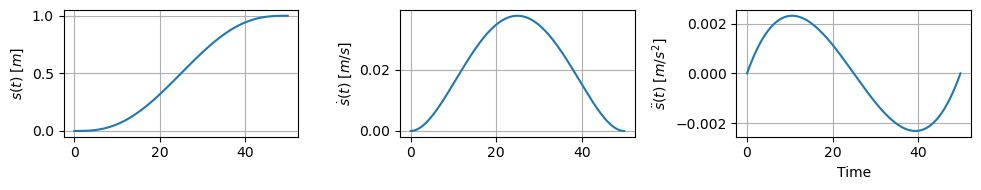

In [4]:
# If you haven't done so, please install the roboticstoolbox:
# !pip install roboticstoolbox-python

import roboticstoolbox as rtb
from spatialmath import *
plt.rcParams.update(plt.rcParamsDefault)

T = 50   # end time
dT = 0.1 # time step
time = np.arange(0, T, step=dT)
start_pos = 0
end_pos = 1
traj = rtb.tools.trajectory.quintic(start_pos, end_pos, time, 0.0, 0.0) #last two are the start and end velocity

# Get the position, velocity and acceleration data from traj
p = traj.q
v = traj.qd
a = traj.qdd


plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
plt.plot(time, p)
plt.grid()
plt.ylabel('$s(t)$ [$m$]')
plt.subplot(1,3,2)
plt.plot(time, v)
plt.grid()
plt.ylabel('$\dot{s}(t)$ [$m/s$]')
plt.subplot(1,3,3)
plt.plot(time, a)
plt.grid()
plt.xlabel('Time')
plt.ylabel('$\ddot{s}(t)$ [$m/s^2$]')
plt.tight_layout()
plt.show()



The plots are smooth curves

When changing the starting position it doesnt change shape of the plots

initial and final velocity was initially set to zero

Changing initial velocity to .5 did change things significantly. The position went to be above the range so it had a peak of 4 or 5 then decreased to 1. 

When changing final velocity the minimum position decreased significantly to be -4..



**Exercise:**
* In the code block below, the trajectory to go from 0 to 1 in $T=50$s with timesteps of $\Delta t=0.1$s is generated again. Take the velocity profile using `traj.qd` (a numpy array) and calculate and print the maximum (`n.max(..)`) and the mean velocity (`n.mean(..)`).
* Devide the mean by the maximum value to calculate the mean as a percentage of the maximum velocity.
* What can you conclude from this?

In [18]:
time = np.arange(0, T, step=dT)
start_pos = 0
end_pos = 1
traj = rtb.tools.trajectory.quintic(start_pos, end_pos, time)


# TODO: PUT YOUR CODE HERE
# velocity profile
v = traj.qd
# max velocity
max_v = np.max(v)
# mean velocity
mean_v = np.mean(v)
# mean as a percentage of max velocity
perc_v = (mean_v/max_v)*100
print(f"Mean as a percentage of the max velocity {perc_v:.3f}%") 

Mean as a percentage of the max velocity 51.774%


So what this shows is that there is a waste of motor performance since average velocity over the path is 53% of the peak velocity showing that the motor is running at far less than its capacity (wasting its performance). In addition to this it will also take us far longer to reach our intended location.

### Smooth 1D trajectories using trapezoidal velocity profiles

For **minimum-time motion** we want the robot to be operating at that maximum velocity for as much of the time as possible. The velocity curve therefore needs to be flatter at the top.

A solution to do this is to generate trajectories that have a **trapezoidal velocity profile**. We can generate this with the function `rtb.tools.trajectory.trapezoidal(start_pos, end_pos, time)` similar to how we generated the polynomial profiles. Run the code below.

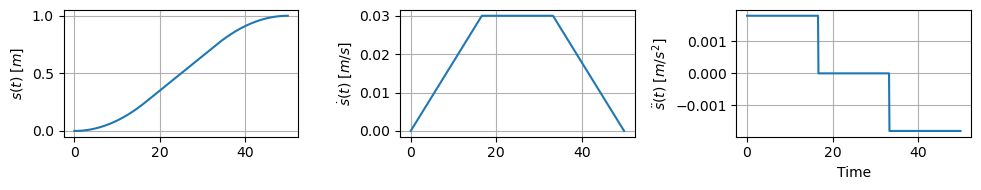

In [6]:
T = 50   # end time
dT = 0.1 # time step
time = np.arange(0, T, step=dT)
start_pos = 0
end_pos = 1
## Using a trapezoidal trajectory
traj = rtb.tools.trajectory.trapezoidal(start_pos, end_pos, time)

# Get the position, velocity and acceleration data from traj
p = traj.q
v = traj.qd
a = traj.qdd


plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
plt.plot(time, p)
plt.grid()
plt.ylabel('$s(t)$ [$m$]')
plt.subplot(1,3,2)
plt.plot(time, v)
plt.grid()
plt.ylabel('$\dot{s}(t)$ [$m/s$]')
plt.subplot(1,3,3)
plt.plot(time, a)
plt.grid()
plt.xlabel('Time')
plt.ylabel('$\ddot{s}(t)$ [$m/s^2$]')
plt.tight_layout()
plt.show()

**Exercise:**
* Look at the plots for the position, velocity and acceleration
* Explain why this trajectory (the position plot) is called a **linear segment with parabolic blends**. 
* Looking at the velocity profile. Which parts of the profile correspond to the parabolic blends and which part to the linear segment?
* Compared to the polynomial trajectory, what do you think of the acceleration profile?

q1&q2 It is called a linear segment since the middle section and linear, and the parabolic ends corresponds to the start and end where there is an acceration and deceleration

q3 The accereration profile remains more constant over the three different stages, but it does have two step discontinuities


### Smooth 2D trajectories

For mobile robots, we typically have to generate smooth paths in the two-dimensional plane. We can do so based on the 1D smooth trajectories, simply by applying linear transformations to the trajectory positions:

Let's make a signal over time, $s(t)$, varying smoothly from 0 to 1, that is $s(t) \in [0,1]$. We can use this to create smooth trajectories for $x$ and $y$ by:
$$
x(s) = (1-s)x_0 + sx_T\\
y(s) = (1-s)y_0 + sy_T
$$
where $(x_0,y_0)$ and $(x_T,y_T)$ are the start and end position of the robot. Because $s$ is smooth and $x$ and $y$ are linear transformations, $x$ and $y$ are also smooth functions over time.

**Exercise:**
* Finish the code below to calculate $x$ and $y$ based on $s(t)$ in line 13 and 14.

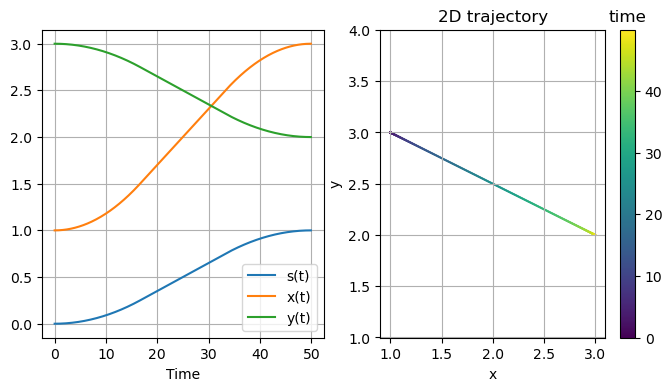

In [7]:
T = 50   # end time
dT = 0.1 # time step
time = np.arange(0, T, step=dT)
s_traj = rtb.tools.trajectory.mtraj(rtb.tools.trajectory.trapezoidal, 0, 1, time)
s = s_traj.q

x_0 = 1 # start position x dir
x_T = 3 # end position x dir
y_0 = 3 # start position y dir
y_T = 2 # end position y dir

# TODO: Calculate x and y from s
x = (1-s)*x_0 + (s*x_T)
y = (1-s)*y_0 +(s*y_T)

# Plot s, x and y AND the trajectory
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(time,s,label='s(t)')
plt.plot(time,x,label='x(t)')
plt.plot(time,y,label='y(t)')
plt.grid()
plt.xlabel('Time')
plt.legend()
plt.subplot(1,2,2)
# Plot the path with color coding for time
plt.scatter(x,y,c=time, marker='.',s=1)
plt.grid()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D trajectory')
clb = plt.colorbar()
clb.ax.set_title('time')
plt.show()


The function `rtb.tools.trajectory.mtraj(tfunc, start_pos, end_pos, time)` implements this and can be used for any dimensionality. Where `tfunc` is the trapezoidal or quintic function that we used before and `start_pos` and `end_pos` are now N-D numpy arrays representing the start and end position in N dimensions.

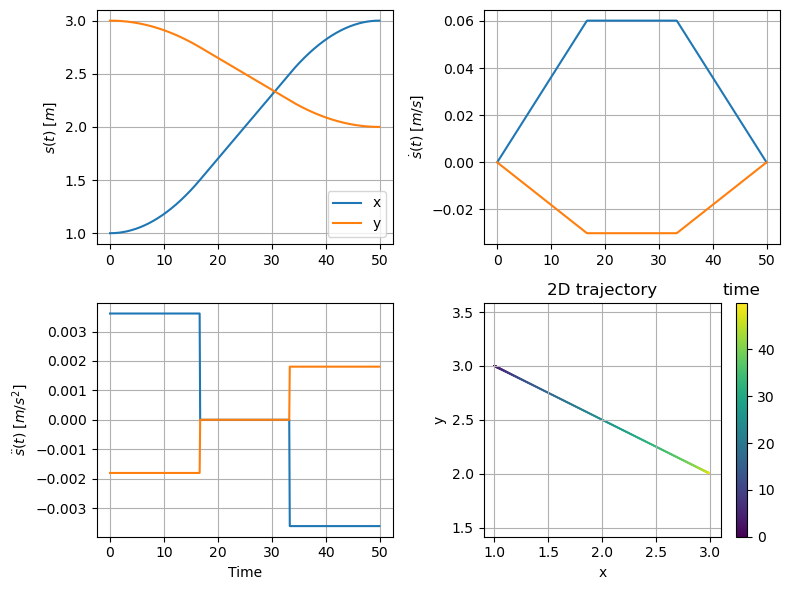

In [19]:
T = 50   # end time
dT = 0.1 # time step
time = np.arange(0, T, step=dT)
start_pos = np.array([1,3])
end_pos = np.array([3,2])
traj = rtb.tools.trajectory.mtraj(rtb.tools.trajectory.trapezoidal, start_pos, end_pos, time)

# Get the position, velocity and acceleration data from traj
p = traj.q
v = traj.qd
a = traj.qdd

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(time, p)
plt.legend(['x','y'])
plt.grid()
plt.ylabel('$s(t)$ [$m$]')
plt.subplot(2,2,2)
plt.plot(time, v)
plt.grid()
plt.ylabel('$\dot{s}(t)$ [$m/s$]')
plt.subplot(2,2,3)
plt.plot(time, a)
plt.grid()
plt.xlabel('Time')
plt.ylabel('$\ddot{s}(t)$ [$m/s^2$]')

# Plot the path with color coding for time
plt.subplot(2,2,4)
plt.scatter(p[:,0],p[:,1],c=time, marker='.', s=1)
#plt.plot(p[:,0], p[:,1])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
clb = plt.colorbar()
clb.ax.set_title('time')
plt.title('2D trajectory')

plt.tight_layout()
plt.show()

### Multi-Segment Trajectories

In the above, you have learned how to create a smooth path from one point to another point. This creates linear trajectories in the 2D space. Typically, we need to create more complex trajectories, going throught multiple points. This results in a **multi-segment trajectory** based on a set of **waypoints**, $Q = \{q_1, q_2, \ldots, q_M\}. 

The most straightforward way would be to simply generate separate trajectories from $q_1$ to $q_2$, from $q_2$ to $q_3$, etc. However, that would result in a path where the robot is continuously slowing down when approaching the point, until a complete stop, after which it would accelerate again to go to the next waypoint. In other words, this would not be a smooth trajectory.

<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig3_5.svg" width=400>

The figure above shows in a 1D case how to create a **smooth multi-segment trajectory**. Again, we use a blend of linear trajectories (in blue) and polynomial blends (in orange). The duration of the polynomial blends is defined by the time $t_{acc}$, which is the time needed to (de)accelerate to to new segment. The quintic polynomial is used here to fit the position, velocity and acceleration at the start and the end of the blend. At the linear segments, a constant velocity $\dot{q}$ is used.

In the next code block, we use the function `rtb.tools.trajectory.mstraj(waypoints, dT, acc_time, v_max)` to generate a multi-segment trajectory using 
* a list of `waypoints`, 
* the desired timestep `dT` ($\Delta t$)
* the time `t_acc` allowed for acceleration to transfer from one segment to the next ($t_{acc}$)
* the maximum velocity `v_max` used for the linear sgements ($\dot{q}$) 

Run the code. You will see the waypoints and the generated trajectory with color coded dots from $t=0$ (yellow) to $t=T$ (blue).


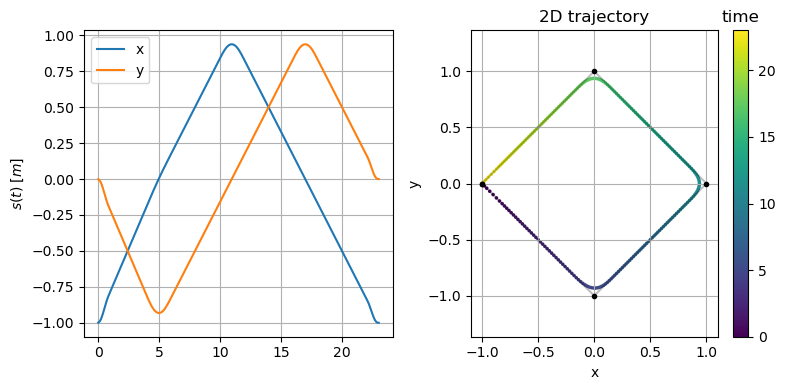

In [11]:
# list of the 2D waypoints (x,y) coords
waypoints = np.array([
    [-1,0],
    [0,-1],
    [1,0],
    [0,1],
    [-1,0]
])
# timestep
dT = 0.1
# the time accerlation allowed for acceleration to transfer from one segment to the next
t_acc = 2
# max velocity for linear segments
v_max = 0.25
traj = rtb.tools.trajectory.mstraj(waypoints, dt=dT, tacc=t_acc, qdmax=v_max)

# Get the position, velocity and acceleration data from traj
p = traj.q
time = np.linspace(0,dT*len(p),len(p))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(time, p) # plotted the position versus time
plt.legend(['x','y'])
plt.grid()
plt.ylabel('$s(t)$ [$m$]')

# Plot the path with color coding for time
plt.subplot(1,2,2)
plt.plot(waypoints[:,0], waypoints[:,1], 'k.') # plots the x's of waypoints and then the y's of waypoints
# WHAT IS PURPOSE OF THIS BELOW LINE?
plt.plot(waypoints[:,0], waypoints[:,1], 'k-', alpha=0.25) # plots x's and y's of waypoints, with this alpha....
plt.scatter(p[:,0],p[:,1],c=time, marker='.', s=10)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
clb = plt.colorbar()
clb.ax.set_title('time')
plt.title('2D trajectory')

plt.tight_layout()
plt.show()

**Exercise:**
* Observe if the trajectory goes through the waypoints. Why not?
* Change the value of `t_acc` to let the robot get closer or further to the waypoint.
* Put back `t_acc = 2`. Now increas the maximum speed, what changes?


The trajectory does not go through the waypoiints. This is because of the fact that it has this time for acceration meaning that it will have this duration of time to change velocity.
Also we can see on the plots that the waypoints are not hit by the trajectory...


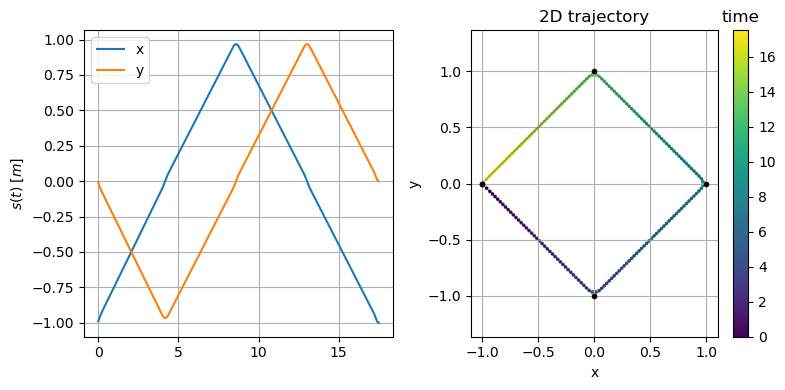

In [12]:
# Changed t_acc to be .5 so it can get super close to the waypoints
# list of the 2D waypoints (x,y) coords
waypoints = np.array([
    [-1,0],
    [0,-1],
    [1,0],
    [0,1],
    [-1,0]
])
# timestep
dT = 0.1
# the time accerlation allowed for acceleration to transfer from one segment to the next
t_acc = .5
# max velocity for linear segments
v_max = 0.25
traj = rtb.tools.trajectory.mstraj(waypoints, dt=dT, tacc=t_acc, qdmax=v_max)

# Get the position, velocity and acceleration data from traj
p = traj.q
time = np.linspace(0,dT*len(p),len(p))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(time, p) # plotted the position versus time
plt.legend(['x','y'])
plt.grid()
plt.ylabel('$s(t)$ [$m$]')

# Plot the path with color coding for time
plt.subplot(1,2,2)
plt.plot(waypoints[:,0], waypoints[:,1], 'k.') # plots the x's of waypoints and then the y's of waypoints
# WHAT IS PURPOSE OF THIS BELOW LINE?
plt.plot(waypoints[:,0], waypoints[:,1], 'k-', alpha=0.25) # plots x's and y's of waypoints, with this alpha....
plt.scatter(p[:,0],p[:,1],c=time, marker='.', s=10)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
clb = plt.colorbar()
clb.ax.set_title('time')
plt.title('2D trajectory')

plt.tight_layout()
plt.show()

> For this one it can be seen that compared to the original plot tha that the trajectory is much closer to the way points due to the reduction in the acceration time.

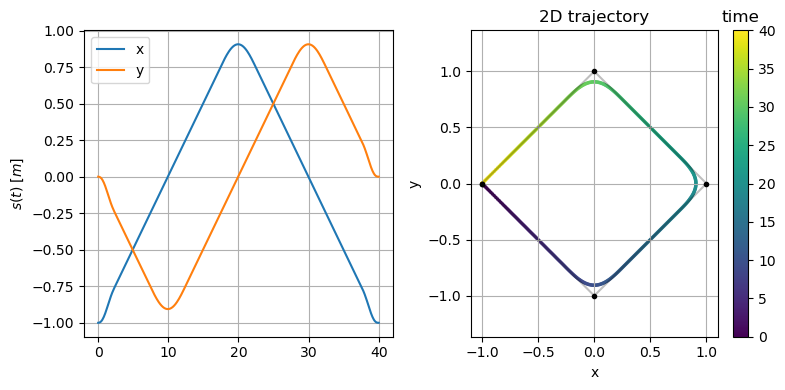

In [13]:
# Changed t_acc to be 5 so that it is super far from the waypoints

# list of the 2D waypoints (x,y) coords
waypoints = np.array([
    [-1,0],
    [0,-1],
    [1,0],
    [0,1],
    [-1,0]
])
# timestep
dT = 0.1
# the time accerlation allowed for acceleration to transfer from one segment to the next
t_acc = 5
# max velocity for linear segments
v_max = 0.25
traj = rtb.tools.trajectory.mstraj(waypoints, dt=dT, tacc=t_acc, qdmax=v_max)

# Get the position, velocity and acceleration data from traj
p = traj.q
time = np.linspace(0,dT*len(p),len(p))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(time, p) # plotted the position versus time
plt.legend(['x','y'])
plt.grid()
plt.ylabel('$s(t)$ [$m$]')

# Plot the path with color coding for time
plt.subplot(1,2,2)
plt.plot(waypoints[:,0], waypoints[:,1], 'k.') # plots the x's of waypoints and then the y's of waypoints
# WHAT IS PURPOSE OF THIS BELOW LINE?
plt.plot(waypoints[:,0], waypoints[:,1], 'k-', alpha=0.25) # plots x's and y's of waypoints, with this alpha....
plt.scatter(p[:,0],p[:,1],c=time, marker='.', s=10)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
clb = plt.colorbar()
clb.ax.set_title('time')
plt.title('2D trajectory')

plt.tight_layout()
plt.show()

> It is much clearer now that the way points do not intersect within the trajectory. There is more time for the acceration around these points to change direction.

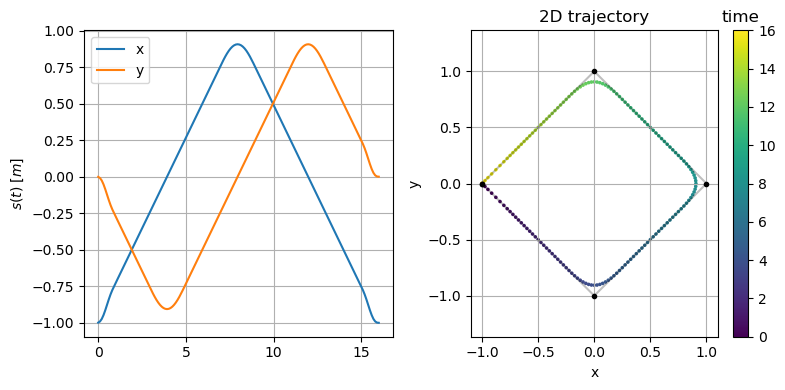

In [15]:
# INCREASED MAX SPEED WHAT CHANGES?
# Changed t_acc to be 5 so that it is super far from the waypoints

# list of the 2D waypoints (x,y) coords
waypoints = np.array([
    [-1,0],
    [0,-1],
    [1,0],
    [0,1],
    [-1,0]
])
# timestep
dT = 0.1
# the time accerlation allowed for acceleration to transfer from one segment to the next
t_acc = 2
# max velocity for linear segments
v_max = 2
traj = rtb.tools.trajectory.mstraj(waypoints, dt=dT, tacc=t_acc, qdmax=v_max)

# Get the position, velocity and acceleration data from traj
p = traj.q
time = np.linspace(0,dT*len(p),len(p))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(time, p) # plotted the position versus time
plt.legend(['x','y'])
plt.grid()
plt.ylabel('$s(t)$ [$m$]')

# Plot the path with color coding for time
plt.subplot(1,2,2)
plt.plot(waypoints[:,0], waypoints[:,1], 'k.') # plots the x's of waypoints and then the y's of waypoints
# WHAT IS PURPOSE OF THIS BELOW LINE?
plt.plot(waypoints[:,0], waypoints[:,1], 'k-', alpha=0.25) # plots x's and y's of waypoints, with this alpha....
plt.scatter(p[:,0],p[:,1],c=time, marker='.', s=10)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
clb = plt.colorbar()
clb.ax.set_title('time')
plt.title('2D trajectory')

plt.tight_layout()
plt.show()

> The increase in speed results in the completion of the path to occur much faster. As it can be seen that the dots are more visible in the second plot such that there are less recorded data points since the robot is moving at such a high speed. In addition to this the time on the left plot is less that the original end time.So overall there is just a reduction in time.